In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

C:\Users\andr\AppData\Roaming\Python\Python310\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [111]:
@np.vectorize
def real_num(s, prev=None, allow_pow=True):
    if '?' in s or len(s) > 4:
        return float('NaN')
    if len(s) == 4:
        if allow_pow:
            if s[-1] == '1':
                return real_num(s[:-1], allow_pow=False)/10
            elif s[-1] == '2':
                return real_num(s[:-1], allow_pow=False)/10**2
        if s == '1000':
            return 1000.0
        else:
            return float('NaN')
    
    return float(s)

def second_filter(x, y):
    for i in range(1, len(x) - 1):
        if abs(y[i] - y[i - 1]) > 50 and abs(y[i] - y[i + 1]) > 50 and (y[i] - y[i + 1]) * (y[i] - y[i - 1]) > 0:
            y[i] = float('NaN')
            #print("!")
        #if abs(y[i] - y[i - 1]) != 0.0: print(abs(y[i] - y[i - 1]), abs(y[i] - y[i + 1]), (y[i] - y[i + 1]) * (y[i] - y[i - 1]))
    mask = y == y
    return x[mask], y[mask]

def order_swap(y, order):
    curr_order = 0
    for i in range(3, len(y) - 3):
        if abs(y[i] - y[i + 1]) > 50: print(y[i], y[i] - y[i + 3])
        if abs(y[i] - y[i + 1]) > 200:
            # print('!')
            y[i] /= 10**curr_order
            # curr_order = order.pop()
        else:
            y[i] /= 10**curr_order
    return y

def plot_measure(name, order = None):
    d = pd.read_csv(f"data/{name}.csv", delimiter=";", comment = "#", header=None)
    data = np.array([d[0], d[1]])

    plt.figure(figsize=(10,7))

    def filter_bad(time, p):
        p = real_num(p)

        mask = p == p
        return time[mask], p[mask]

    data = filter_bad(data[0], data[1])
    x, y = second_filter(*data)
    y = uniform_filter1d(y, 4)
    if order is not None:
        y = order_swap(y, order)
    plt.plot(x, y)

1000.0 632.25
789.25 632.25
578.5 421.5
367.75 210.75
157.0 -333.75
268.25 -333.75
379.5 -222.5
490.75 -111.25
602.0 216.0
530.0 216.0
458.0 144.0
386.0 72.0
100.0 -666.0
322.0 -666.0
544.0 -444.0
766.0 -222.0
245.0 -222.75
319.25 -222.75
393.5 -148.5
467.75 -74.25
542.0 314.25
437.25 314.25
332.5 209.5
227.75 104.75
959.75 651.75
742.5 634.5
525.25 417.25
308.0 200.0


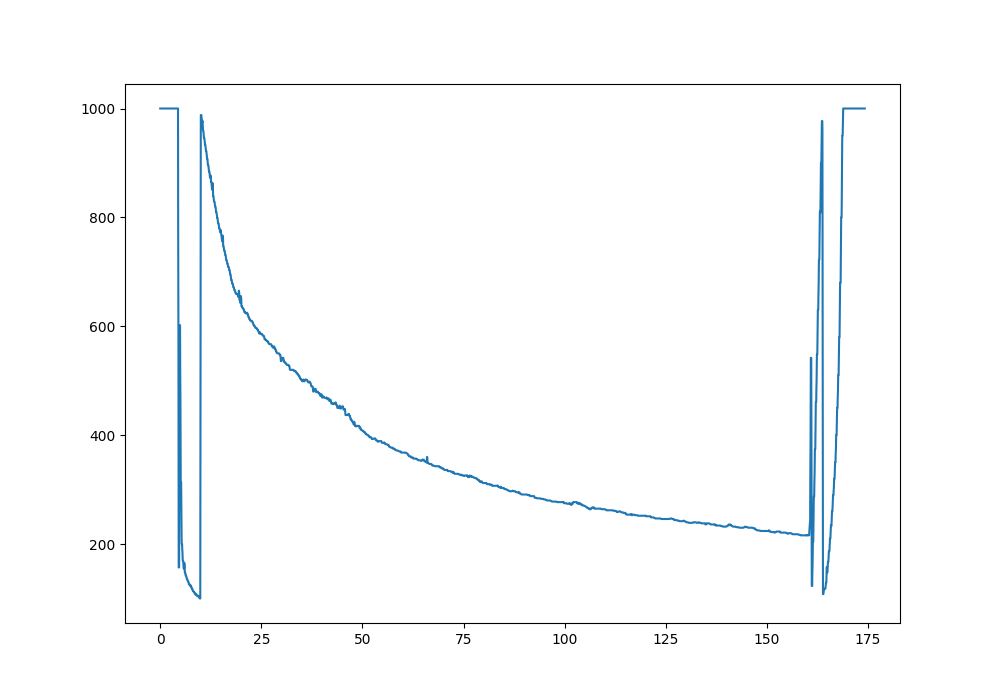

In [112]:
%matplotlib widget
plot_measure('IMG_5566', {4.75: 10**-1, })

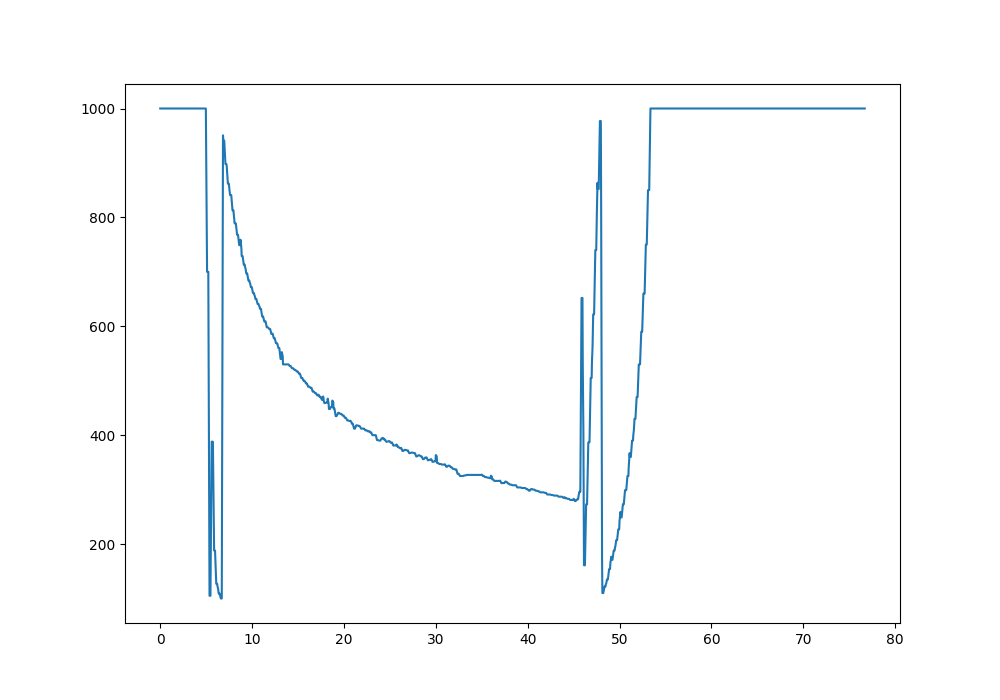

In [69]:
%matplotlib widget
plot_measure('IMG_5567')

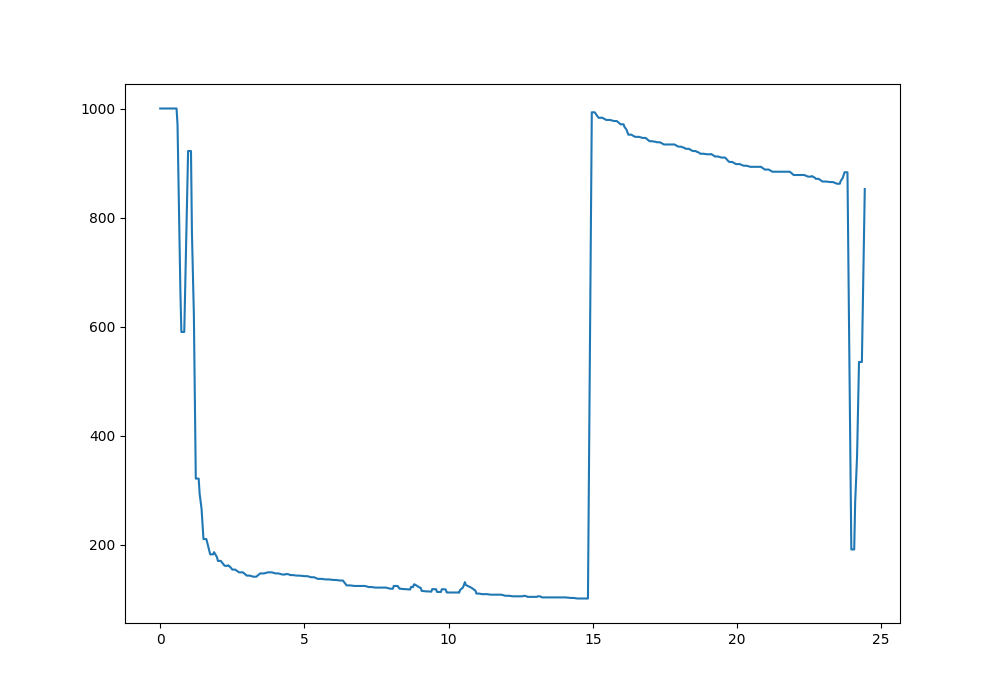

In [70]:
%matplotlib widget
plot_measure('IMG_5568')

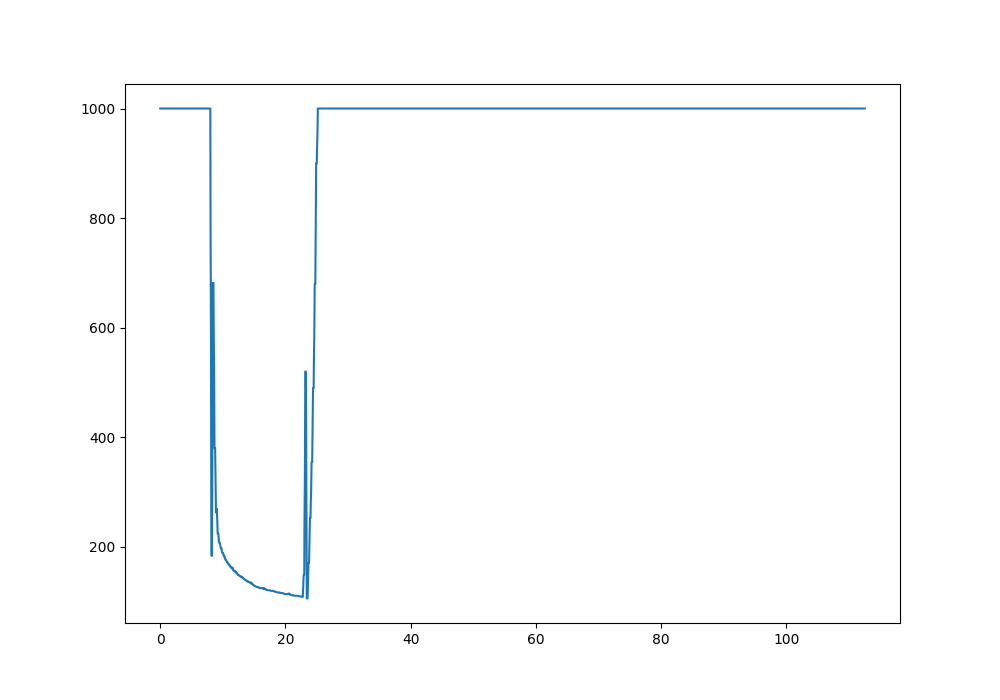

In [71]:
%matplotlib widget
plot_measure('IMG_5569')

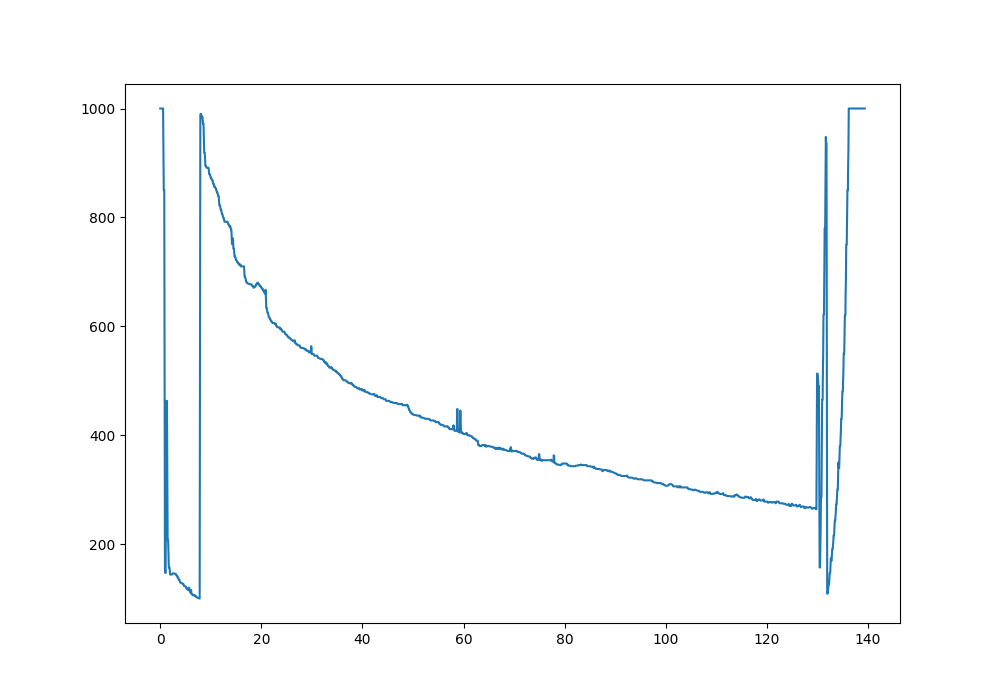

In [72]:
%matplotlib widget
plot_measure('IMG_5570')

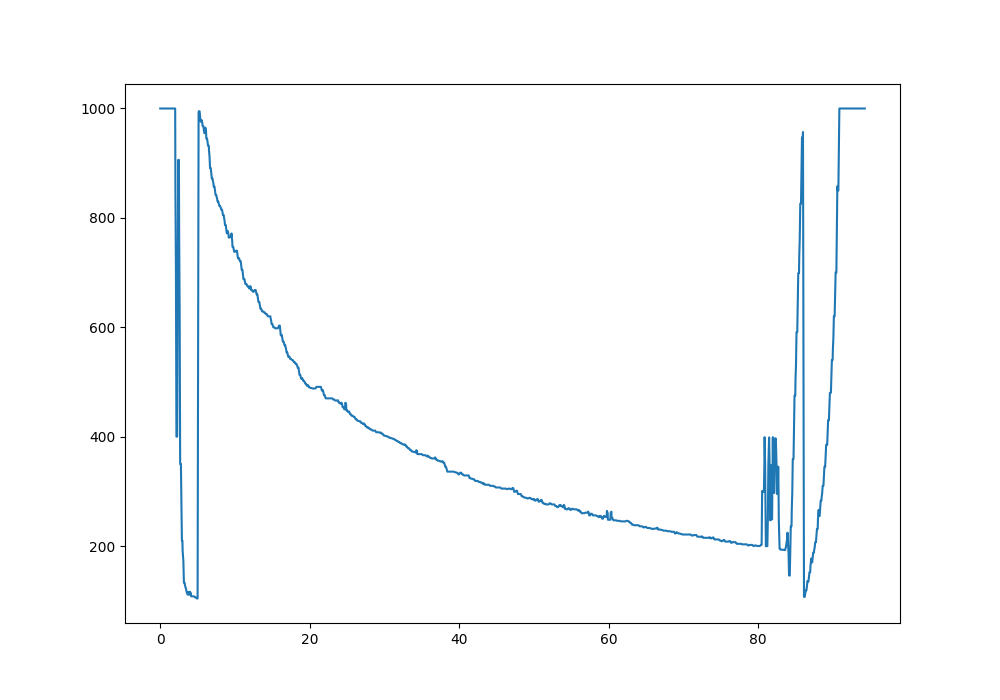

In [73]:
%matplotlib widget
plot_measure('build_2')

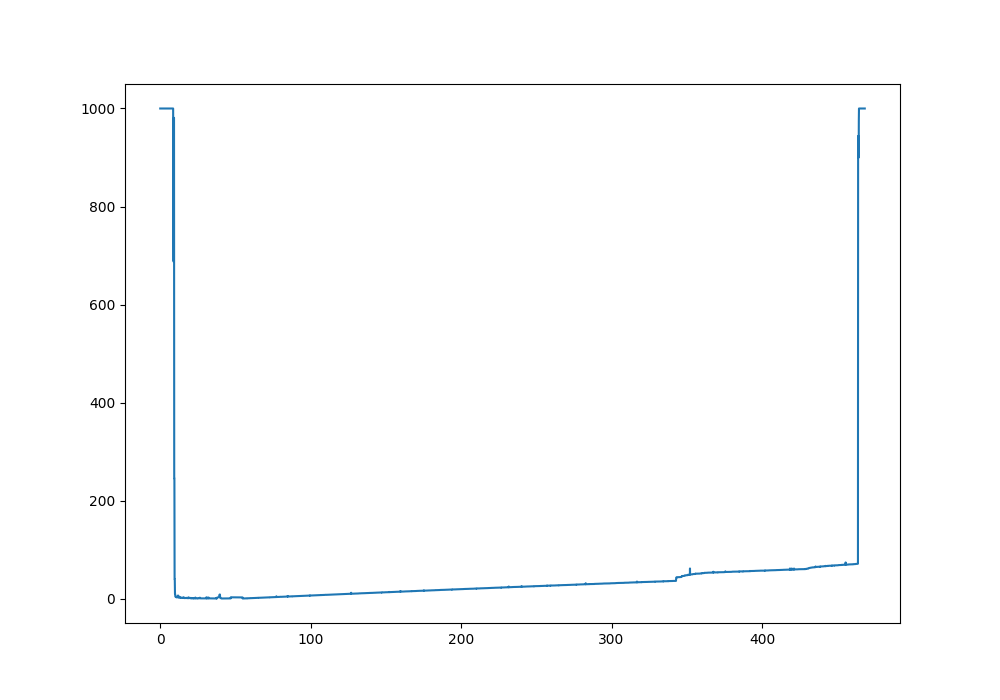

In [74]:
%matplotlib widget
plot_measure('nothing')